## W 7-L 6. Machine Learning Linear Regression:Vehicle Data Analysis and Regression Models

## Part 1: Simple Linear Regression with vehicles_1.csv

**Importing Data and Initial Processing:**

1. Import the dataset vehicles_1.csv. Display the first five rows of the dataset

In [ ]:
import pandas as pd

vehicles_1 = pd.read_csv('vehicles_1.csv')

vehicles_1.head()

,weight,mpg
0,2.639,28.0
1,3.517,25.0
2,3.470,26.0
3,3.850,22.0
4,2.998,27.0


2. Check for any missing values in the dataset. If found, describe your approach to handling them

In [ ]:
missing_values = vehicles_1.isnull().sum()

print(missing_values)

weight    12
mpg        3
dtype: int64


- For numerical columns like weight and mpg, we cab impute missing values using the mean or median. Which is a non-destructive way to retain the data

**Descriptive Statistics:**

3. Use pandas to display a summary of each column in the dataset. Highlight any
peculiarities you notice (e.g., missing values, unusual data ranges).

In [ ]:
summary_stats = vehicles_1.describe()

print(summary_stats)

           weight         mpg
count  145.000000  154.000000
mean     3.369848   23.844156
std      0.618460    4.282706
min      1.895000   15.000000
25%      2.967000   21.000000
50%      3.340000   24.000000
75%      3.821000   26.000000
max      5.572000   45.000000


The highest weight is 5.572 and mpg is 45 but all data seems have a reasonalble data range in the context of vehicles currently on the road and there were a few missing values for each column as highlighted in Q.2

4. Plot histograms for both weight and
mpg. Are the distributions skewed? Comment on their shapes.

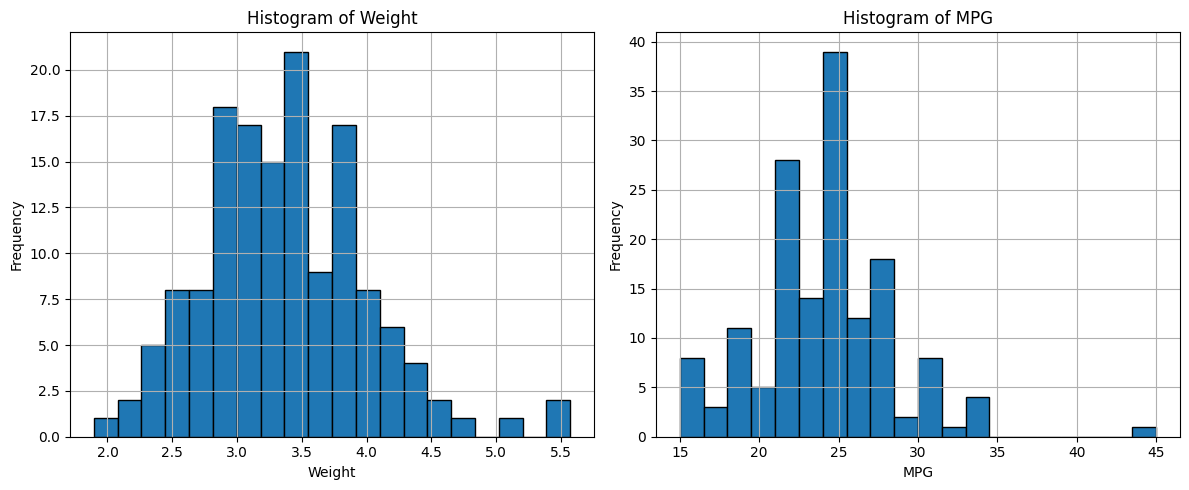

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
vehicles_1['weight'].hist(bins=20, edgecolor='black')
plt.title('Histogram of Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
vehicles_1['mpg'].hist(bins=20, edgecolor='black')
plt.title('Histogram of MPG')
plt.xlabel('MPG')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Weight Distribution: The weight distribution data shows a slight right skew, primarily grouping between 3.0 and 3.5. Heavier vehicles above 4.5 are less common.

MPG Distribution: Similarly, the mpg data is right-skewed, with the majority of values ranging from 20 to 30 mpg. A few outliers are found around 45 mpg.

**Data Preprocessing:**

5. If there are any missing values, impute them using an appropriate method (e.g.,mean imputation)

In [ ]:
vehicles_1['weight'] = vehicles_1['weight'].fillna(vehicles_1['weight'].mean())
vehicles_1['mpg'] = vehicles_1['mpg'].fillna(vehicles_1['mpg'].mean())

print(vehicles_1.isnull().sum())

weight    0
mpg       0
dtype: int64


6. Standardize the weight and mpg columns by scaling them to have a mean of 0 and a
standard deviation of 1.

In [ ]:
vehicles_1['weight_standardized'] = (vehicles_1['weight'] - vehicles_1['weight'].mean()) / vehicles_1['weight'].std()
vehicles_1['mpg_standardized'] = (vehicles_1['mpg'] - vehicles_1['mpg'].mean()) / vehicles_1['mpg'].std()

vehicles_1[['weight_standardized', 'mpg_standardized']].head()

,weight_standardized,mpg_standardized
0,-1.229975,0.979846
1,0.247648,0.272520
2,0.168550,0.508295
3,0.808068,-0.434806
4,-0.625799,0.744070


**Simple Linear Regression:**

7. Build a simple linear regression model to predict mpg based on weight.
Provide the code to fit the model.

In [ ]:
from sklearn.linear_model import LinearRegression

X = vehicles_1[['weight']].values  # Predictor (weight)
y = vehicles_1['mpg'].values  # Target (mpg)

model = LinearRegression()
model.fit(X, y)

print(f"Coefficient (slope): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

Coefficient (slope): -5.59673815875272
Intercept: 42.70431427888015


8. Display the equation of the fitted line and interpret the coefficients.

- mpg = −5.60 × weight + 42.70 (mpg=slope×weight+intercept)
- Slope (-5.60): For every unit increase in weight, mpg drops by 5.60, as vehicles get heavier, their fuel efficiency drops.
- Intercept (42.70): Predicted mpg when weight is zero (though that's not realistic for vehicles). It helps position the regression line correctly on the graph.


9.
Plot the regression line along with the actual data points for visualization.

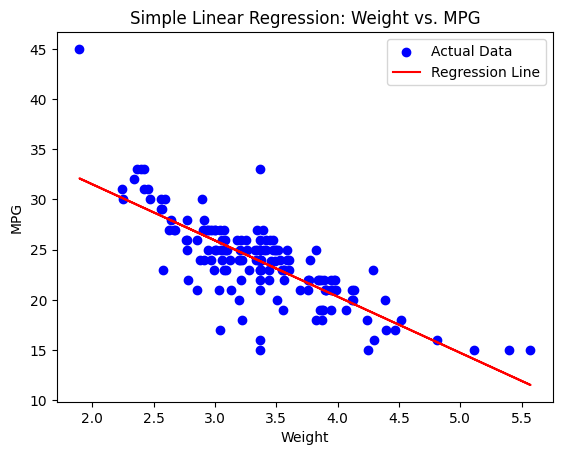

In [ ]:
plt.scatter(vehicles_1['weight'], vehicles_1['mpg'], color='blue', label='Actual Data')

regression_line = model.coef_[0] * vehicles_1['weight'] + model.intercept_

plt.plot(vehicles_1['weight'], regression_line, color='red', label='Regression Line')

plt.xlabel('Weight')
plt.ylabel('MPG')
plt.title('Simple Linear Regression: Weight vs. MPG')
plt.legend()

plt.show()

10. Evaluate the model
performance by calculating and displaying the R-squared value and the root mean squared error (RMSE).

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X)

r_squared = r2_score(y, y_pred)

rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"R-squared: {r_squared}")
print(f"RMSE: {rmse}")

R-squared: 0.6147920727373156
RMSE: 2.623987214881387


# Part 2: Multiple Linear Regression with vehicles_2.csv

**Importing Data and Initial Processing:**

1. Import the dataset vehicles_2.csv into a pandas DataFrame. Display the first five rows of the
dataset

In [ ]:
vehicles_2 = pd.read_csv('vehicles_2.csv')

vehicles_2.head()

,sales,type,price,engine,horsepow,wheelbas,width,length,weight,fuelcap,mpg
0,16.919,Automobile,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0
1,39.384,Automobile,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0
2,14.114,Automobile,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0
3,8.588,Automobile,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0
4,20.397,Automobile,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0


2. Check for any missing values in the dataset. If found, describe your approach to handling them.

In [ ]:
missing_values_2 = vehicles_2.isnull().sum()

print(missing_values_2)

sales       0
type        0
price       4
engine      5
horsepow    4
wheelbas    6
width       5
length      2
weight      9
fuelcap     2
mpg         3
dtype: int64


There are no missing values in the 'sales' and 'type' columns, so I will handle any missing values in the numerical columns by imputing them with the mean. This is a widely used and effective approach for filling in gaps in data.

**Descriptive Statistics:**

3. Use pandas to display a summary of each column in the dataset. Highlight any
peculiarities you notice (e.g., missing values, unusual data ranges).

In [ ]:
summary_stats_2 = vehicles_2.describe()

print(summary_stats_2)

            sales       price      engine    horsepow    wheelbas       width  \
count  157.000000  153.000000  152.000000  153.000000  151.000000  152.000000   
mean    52.998076   27.100863    3.055921  184.745098  107.596689   71.190789   
std     68.029422   13.702815    1.045503   55.687985    7.608902    3.415166   
min      0.110000    9.235000    1.000000   55.000000   92.600000   65.700000   
25%     14.114000   18.145000    2.300000  148.000000  103.150000   68.400000   
50%     29.450000   22.799000    3.000000  175.000000  107.000000   70.550000   
75%     67.956000   31.930000    3.500000  215.000000  112.200000   73.450000   
max    540.561000   85.500000    8.000000  450.000000  138.700000   79.900000   

           length      weight     fuelcap         mpg  
count  155.000000  148.000000  155.000000  154.000000  
mean   187.350968    3.369338   17.977419   23.844156  
std     13.474976    0.629819    3.887418    4.282706  
min    149.400000    1.895000   10.300000   15

Missing values: Some columns have fewer entries than others, indicating missing data. For example, 'sales' has 157 entries, but 'weight' only has 148.
Wide data ranges: There are large differences between the minimum and maximum values in some columns. For instance, 'sales' ranges from 0.11 to 540.56, and 'horsepower' ranges from 55 to 450.
Outliers: Extremely high values in certain columns suggest potential outliers, such as 'sales' with a max of 540.56 and 'mpg' going up to 45.
Different scales: Some variables like 'price' range from 9.23 to 85.5, while others like 'weight' are in the range of 1.89 to 5.57, indicating that the features are measured on very different scales.

4. Plot histograms for price, engine,
horsepower, wheelbase, and mpg. Are the distributions skewed? Comment on their shapes.

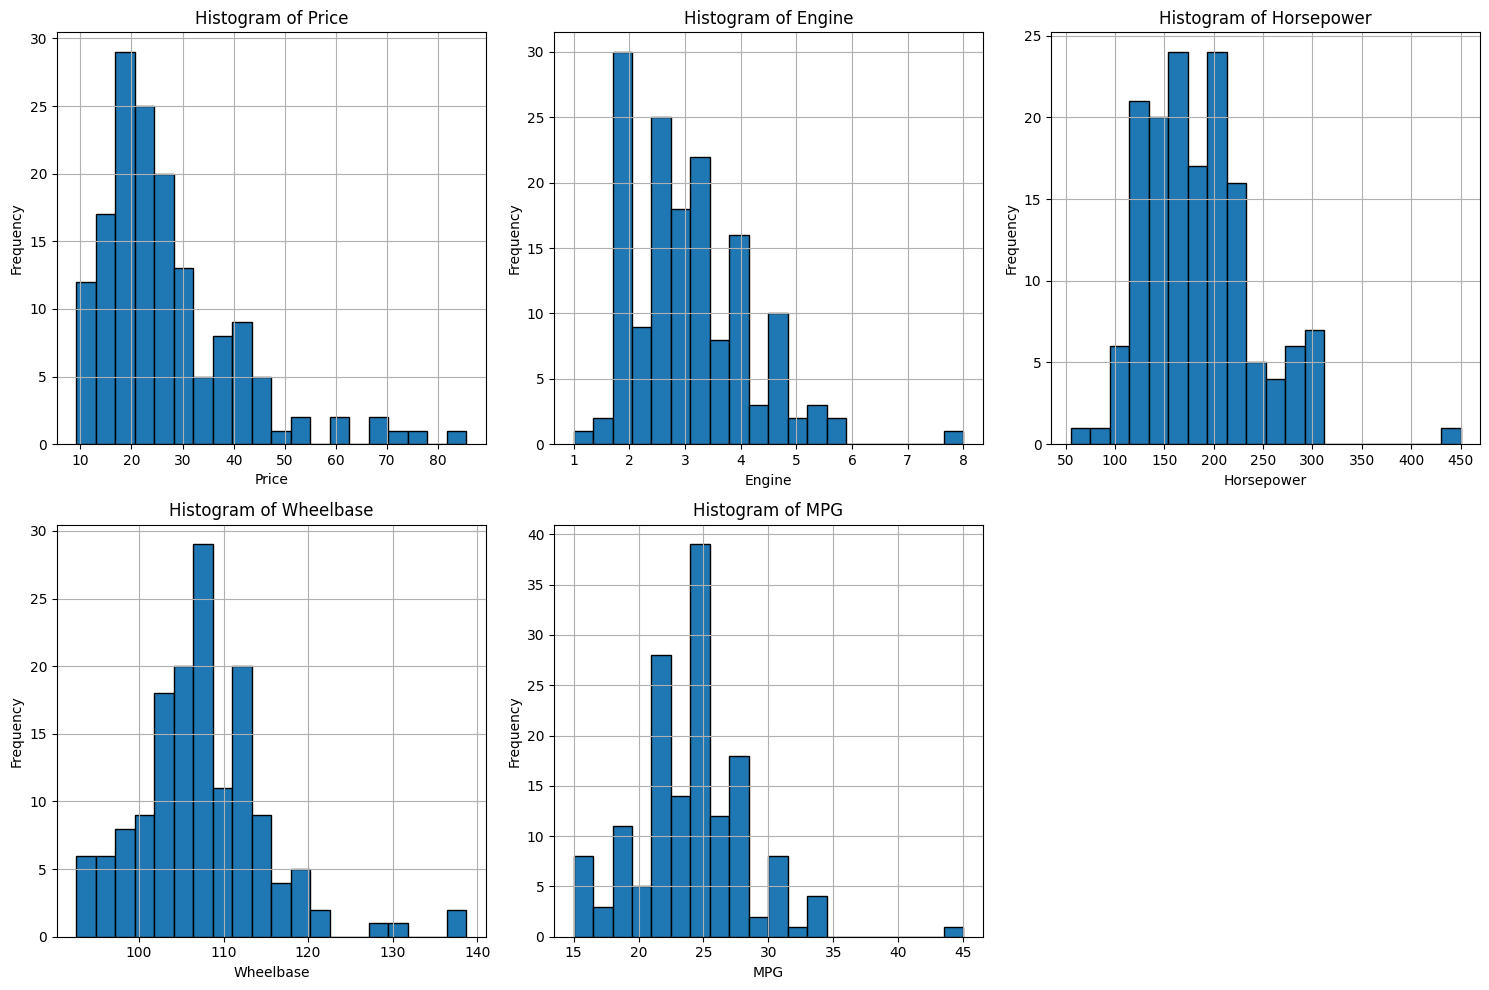

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
vehicles_2['price'].hist(bins=20, edgecolor='black')
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(2, 3, 2)
vehicles_2['engine'].hist(bins=20, edgecolor='black')
plt.title('Histogram of Engine')
plt.xlabel('Engine')
plt.ylabel('Frequency')

plt.subplot(2, 3, 3)
vehicles_2['horsepow'].hist(bins=20, edgecolor='black')
plt.title('Histogram of Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Frequency')

plt.subplot(2, 3, 4)
vehicles_2['wheelbas'].hist(bins=20, edgecolor='black')
plt.title('Histogram of Wheelbase')
plt.xlabel('Wheelbase')
plt.ylabel('Frequency')

plt.subplot(2, 3, 5)
vehicles_2['mpg'].hist(bins=20, edgecolor='black')
plt.title('Histogram of MPG')
plt.xlabel('MPG')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

- Price: Right-skewed, with most values between 10 and 40, but some outliers extending up to 85.
- Engine: Right-skewed, with most values between 2 and 4, and a few outliers near 8.
- Horsepower: Mostly right-skewed, with most values between 100 and 300, but one outlier at 450.
- Wheelbase: Slightly right-skewed, most values around 100 to 120, with a few outliers near 140.
- MPG: Right-skewed, with most values between 20 and 30, and a few outliers around 45.

**Data Preprocessing:**

5. Handle any missing data by either removing rows or imputing values.

In [ ]:
vehicles_2['price'] = vehicles_2['price'].fillna(vehicles_2['price'].mean())
vehicles_2['engine'] = vehicles_2['engine'].fillna(vehicles_2['engine'].mean())
vehicles_2['horsepow'] = vehicles_2['horsepow'].fillna(vehicles_2['horsepow'].mean())
vehicles_2['wheelbas'] = vehicles_2['wheelbas'].fillna(vehicles_2['wheelbas'].mean())
vehicles_2['width'] = vehicles_2['width'].fillna(vehicles_2['width'].mean())
vehicles_2['length'] = vehicles_2['length'].fillna(vehicles_2['length'].mean())
vehicles_2['weight'] = vehicles_2['weight'].fillna(vehicles_2['weight'].mean())
vehicles_2['fuelcap'] = vehicles_2['fuelcap'].fillna(vehicles_2['fuelcap'].mean())
vehicles_2['mpg'] = vehicles_2['mpg'].fillna(vehicles_2['mpg'].mean())

print(vehicles_2.isnull().sum())

sales       0
type        0
price       0
engine      0
horsepow    0
wheelbas    0
width       0
length      0
weight      0
fuelcap     0
mpg         0
dtype: int64


6. Convert
any categorical variables (e.g., type) into numerical representations using one-hot encoding or label
encoding.

In [ ]:
vehicles_2_encoded = pd.get_dummies(vehicles_2, columns=['type'], drop_first=True).astype(int)

vehicles_2_encoded.head()

,sales,price,engine,horsepow,wheelbas,width,length,weight,fuelcap,mpg,type_Truck
0,16,21,1,140,101,67,172,2,13,28,0
1,39,28,3,225,108,70,192,3,17,25,0
2,14,27,3,225,106,70,192,3,17,26,0
3,8,42,3,210,114,71,196,3,18,22,0
4,20,23,1,150,102,68,178,2,16,27,0


7. Standardize the numeric columns (price, engine, horsepower, etc.) by scaling them to have a
mean of 0 and a standard deviation of 1.

In [ ]:
numeric_columns = ['price', 'engine', 'horsepow', 'wheelbas', 'width', 'length', 'weight', 'fuelcap', 'mpg']

scaler = StandardScaler()

vehicles_2_encoded[numeric_columns] = scaler.fit_transform(vehicles_2_encoded[numeric_columns])

vehicles_2_encoded.head()

,sales,price,engine,horsepow,wheelbas,width,length,weight,fuelcap,mpg,type_Truck
0,16,-0.415045,-1.594215,-0.816257,-0.836312,-1.113145,-1.119081,-1.281607,-1.186538,0.986428,0
1,39,0.103290,0.287678,0.735003,0.102510,-0.223007,0.380029,0.219977,-0.169968,0.277103,0
2,14,0.029242,0.287678,0.735003,-0.165725,-0.223007,0.380029,0.219977,-0.169968,0.513545,0
3,8,1.139960,0.287678,0.461251,0.907215,0.073706,0.679852,0.219977,0.084175,-0.432221,0
4,20,-0.266950,-1.594215,-0.633755,-0.702195,-0.816432,-0.669348,-1.281607,-0.424110,0.749986,0


**Multiple Linear Regression:**

8. Build a multiple linear regression model to predict mpg based on the
following features: weight, engine, horsepower, wheelbase, and fuelcap.Provide the code to fit the model.

In [ ]:
X = vehicles_2_encoded[['weight', 'engine', 'horsepow', 'wheelbas', 'fuelcap']]

y = vehicles_2_encoded['mpg']

model = LinearRegression()

model.fit(X, y)

print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Coefficients: [-0.21082424 -0.2143737  -0.09587136  0.06902929 -0.49981387]
Intercept: -2.175898367849549e-18


9. Display the equation of the fitted model and interpret the coefficients.

mpg= −0.21 × weight −0.21 × engine −0.10 × horsepower + 0.07 × wheelbase −0.50 × fuelcap
- Weight (-0.21): For every unit increase in weight, mpg decreases by 0.21, holding other variables constant.
- Engine (-0.21): For every unit increase in engine size, mpg decreases by 0.21, all else equal.
- Horsepower (-0.10): Higher horsepower is associated with a 0.10 decrease in mpg, assuming other factors remain constant.
- Wheelbase (+0.07): A larger wheelbase slightly increases mpg by 0.07 units, keeping other variables constant.
- Fuel Capacity (-0.50): For every unit increase in fuel capacity, mpg decreases by 0.50, holding other factors constant.

10. Evaluate the model
performance by calculating and displaying the R-squared value and the root mean squared error (RMSE).

In [ ]:
y_pred = model.predict(X)

r_squared = r2_score(y, y_pred)

rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"R-squared: {r_squared}")
print(f"RMSE: {rmse}")

R-squared: 0.7349769930541815
RMSE: 0.5148038528855612


11. Which features are the most significant predictors of mpg? Explain how you determined their
significance.

I determined the most important predictors by looking at the size of the coefficients in the model. The bigger the coefficient, the more impact that feature has on predicting mpg.

- Fuelcap has the largest coefficient (-0.50), so it has the biggest effect on mpg. Weight and engine both have similar coefficients (-0.21), meaning they have a moderate influence on mpg.